# freud.box.Box

In this notebook, we demonstrate the basic features of the `Box` class, including wrapping particles back into the box under periodic boundary conditions.
For more information, see the [introduction to Periodic Boundary Conditions](https://freud.readthedocs.io/en/stable/tutorial/periodic.html) and the `freud.box` [documentation](https://freud.readthedocs.io/en/stable/box.html).

## Creating a Box object

Boxes may be constructed explicitly using all arguments.
Such construction is useful when performing *ad hoc* analyses involving custom boxes.
In general, boxes are assumed to be 3D and [orthorhombic](https://en.wikipedia.org/wiki/Orthorhombic_crystal_system) unless otherwise specified.

In [1]:
import freud.box

# All of the below examples are valid boxes.
box = freud.box.Box(Lx=5, Ly=6, Lz=7, xy=0.5, xz=0.6, yz=0.7, is2D=False)
box = freud.box.Box(1, 3, 2, 0.3, 0.9)
box = freud.box.Box(5, 6, 7)
box = freud.box.Box(5, 6, is2D=True)
box = freud.box.Box(5, 6, xy=0.5, is2D=True)

## From another Box object

The simplest case is simply constructing one freud box from another.

**Note that all forms of creating boxes aside from the explicit method above use methods defined within the Box class rather than attempting to overload the constructor itself.**

In [2]:
box = freud.box.Box(1, 2, 3)
box2 = freud.box.Box.from_box(box)
print(f"The original box: \n\t{box}")
print(f"The copied box: \n\t{box2}\n")

# Boxes are always copied by value, not by reference
box.Lx = 5
print(f"The original box is modified: \n\t{box}")
print(f"The copied box is not: \n\t{box2}\n")

# Note, however, that box assignment creates a new object that
# still points to the original box object, so modifications to
# one are visible on the other.
box3 = box2
print(f"The new copy: \n\t{box3}")
box2.Lx = 2
print(f"The new copy after the original is modified: \n\t{box3}")
print(f"The modified original box: \n\t{box2}")

The original box: 
	freud.box.Box(Lx=1.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)
The copied box: 
	freud.box.Box(Lx=1.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)

The original box is modified: 
	freud.box.Box(Lx=5.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)
The copied box is not: 
	freud.box.Box(Lx=1.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)

The new copy: 
	freud.box.Box(Lx=1.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)
The new copy after the original is modified: 
	freud.box.Box(Lx=2.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)
The modified original box: 
	freud.box.Box(Lx=2.0, Ly=2.0, Lz=3.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)


## From a matrix

A box can be constructed directly from the box matrix representation described above using the `Box.from_matrix` method.

In [3]:
# Matrix representation. Note that the box vectors must represent
# a right-handed coordinate system! This translates to requiring
# that the matrix be upper triangular.
box = freud.box.Box.from_matrix([[1, 1, 0], [0, 1, 0.5], [0, 0, 0.5]])
print(f"This is a 3D box from a matrix: \n\t{box}\n")

# 2D box
box = freud.box.Box.from_matrix([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
print(f"This is a 2D box from a matrix: \n\t{box}\n")

# Automatic matrix detection using from_box
box = freud.box.Box.from_box([[1, 1, 0], [0, 1, 0.5], [0, 0, 0.5]])
print(f"The box matrix was automatically detected: \n\t{box}\n")

# Boxes can be numpy arrays as well
import numpy as np

box = freud.box.Box.from_box(np.array([[1, 1, 0], [0, 1, 0.5], [0, 0, 0.5]]))
print(f"Using a 3x3 numpy array: \n\t{box}")

This is a 3D box from a matrix: 
	freud.box.Box(Lx=1.0, Ly=1.0, Lz=0.5, xy=1.0, xz=0.0, yz=1.0, is2D=False)

This is a 2D box from a matrix: 
	freud.box.Box(Lx=1.0, Ly=1.0, Lz=0.0, xy=0.0, xz=0.0, yz=0.0, is2D=True)

The box matrix was automatically detected: 
	freud.box.Box(Lx=1.0, Ly=1.0, Lz=0.5, xy=1.0, xz=0.0, yz=1.0, is2D=False)

Using a 3x3 numpy array: 
	freud.box.Box(Lx=1.0, Ly=1.0, Lz=0.5, xy=1.0, xz=0.0, yz=1.0, is2D=False)


## From a namedtuple or dict

A box can be also be constructed from any object that provides an attribute for `Lx`, `Ly`, `Lz`, `xy`, `xz`, and `yz` (or some subset), such as a `namedtuple`.
This method is suitable for passing in box objects constructed by some other program, for example.

In [4]:
from collections import namedtuple

MyBox = namedtuple("mybox", ["Lx", "Ly", "Lz", "xy", "xz", "yz"])

box = freud.box.Box.from_box(MyBox(Lx=5, Ly=3, Lz=2, xy=0, xz=0, yz=0))
print(f"Box from named tuple: \n\t{box}\n")

box = freud.box.Box.from_box(MyBox(Lx=5, Ly=3, Lz=0, xy=0, xz=0, yz=0))
print(f"2D Box from named tuple: \n\t{box}")

Box from named tuple: 
	freud.box.Box(Lx=5.0, Ly=3.0, Lz=2.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)

2D Box from named tuple: 
	freud.box.Box(Lx=5.0, Ly=3.0, Lz=0.0, xy=0.0, xz=0.0, yz=0.0, is2D=True)


Similarly, construction is also possible using any object that supports key-value indexing, such as a dict.

In [5]:
box = freud.box.Box.from_box(dict(Lx=5, Ly=3, Lz=2))
print(f"Box from dict: \n\t{box}")

Box from dict: 
	freud.box.Box(Lx=5.0, Ly=3.0, Lz=2.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)


## From a list

Finally, boxes can be constructed from any simple iterable that provides the elements in the correct order.

In [6]:
box = freud.box.Box.from_box((5, 6, 7, 0.5, 0, 0.5))
print(f"Box from tuple: \n\t{box}\n")

box = freud.box.Box.from_box([5, 6])
print(f"2D Box from list: \n\t{box}")

Box from tuple: 
	freud.box.Box(Lx=5.0, Ly=6.0, Lz=7.0, xy=0.5, xz=0.0, yz=0.5, is2D=False)

2D Box from list: 
	freud.box.Box(Lx=5.0, Ly=6.0, Lz=0.0, xy=0.0, xz=0.0, yz=0.0, is2D=True)


## Convenience APIs

We also provide convenience constructors for common geometries, namely square (2D) and cubic (3D) boxes.

In [7]:
cube_box = freud.box.Box.cube(L=5)
print(f"Cubic Box: \n\t{cube_box}\n")

square_box = freud.box.Box.square(L=5)
print(f"Square Box: \n\t{square_box}")

Cubic Box: 
	freud.box.Box(Lx=5.0, Ly=5.0, Lz=5.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)

Square Box: 
	freud.box.Box(Lx=5.0, Ly=5.0, Lz=0.0, xy=0.0, xz=0.0, yz=0.0, is2D=True)


## Export

If you want to export or display the box, you can export box objects into their matrix or dictionary representations, which provide completely specified descriptions of the box.

In [8]:
cube_box = freud.box.Box.cube(L=5)
cube_box.to_matrix()

array([[5., 0., 0.],
       [0., 5., 0.],
       [0., 0., 5.]])

In [9]:
cube_box.to_dict()

{'Lx': 5.0,
 'Ly': 5.0,
 'Lz': 5.0,
 'xy': 0.0,
 'xz': 0.0,
 'yz': 0.0,
 'dimensions': 3}

## Using boxes

Given a freud box object, you can query it for all its attributes.

In [10]:
box = freud.box.Box.from_matrix([[10, 0, 0], [0, 10, 0], [0, 0, 10]])
print(
    "L_x = {}, L_y = {}, L_z = {}, xy = {}, xz = {}, yz = {}".format(
        box.Lx, box.Ly, box.Lz, box.xy, box.xz, box.yz
    )
)

print(f"The length vector: {box.L}")
print(
    "The inverse length vector: ({:1.2f}, {:1.2f}, {:1.2f})".format(
        *[L for L in box.L_inv]
    )
)

L_x = 10.0, L_y = 10.0, L_z = 10.0, xy = 0.0, xz = 0.0, yz = 0.0
The length vector: [10. 10. 10.]
The inverse length vector: (0.10, 0.10, 0.10)


Boxes also support converting between fractional and absolute coordinates.

**Note that the origin in real coordinates is defined at the center of the box.** This means the fractional coordinate range $[0, 1]$ maps onto $[-L/2, L/2]$, not $[0, L]$.

In [11]:
# Convert from fractional to absolute coordinates.
print(box.make_absolute([[0, 0, 0], [0.5, 0.5, 0.5], [0.8, 0.3, 1]]))
print()

# Convert from fractional to absolute coordinates and back.
print(
    box.make_fractional(box.make_absolute([[0, 0, 0], [0.5, 0.5, 0.5], [0.8, 0.3, 1]]))
)

[[-5. -5. -5.]
 [ 0.  0.  0.]
 [ 3. -2.  5.]]

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [0.8 0.3 1. ]]


Finally (and most critically for enforcing periodicity), boxes support wrapping vectors from outside the box into the box.
The concept of periodicity and box wrapping is most easily demonstrated visually.

In [12]:
# Construct the box and get points for plotting
Lx = Ly = 10
xy = 0.5
box = freud.box.Box.from_matrix([[Lx, xy * Ly, 0], [0, Ly, 0], [0, 0, 0]])
box.plot()

With periodic boundary conditions, what this actually represents is an infinite set of these boxes tiling space.
For example, you can locally picture this box as surrounding by a set of identical boxes.

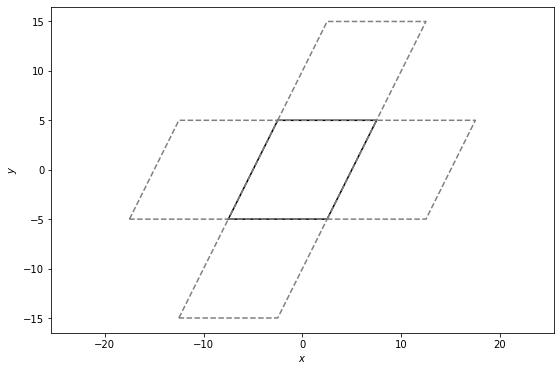

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
box.plot(ax=ax)
for image in [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0]]:
    box.plot(ax=ax, image=image, linestyle="dashed", color="gray")
plt.show()

Any particles in the original box will also therefore be seen as existing in all the neighboring boxes.

In [14]:
np.random.seed(0)
fractional_coords = np.zeros((5, 3))
fractional_coords[:, :2] = np.random.rand(5, 2)
particles = box.make_absolute(fractional_coords)

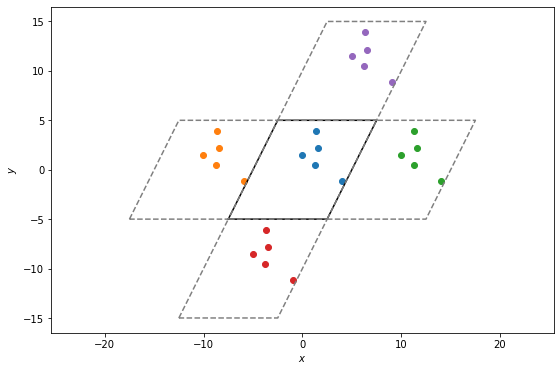

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the points in the original box.
box.plot(ax=ax)
ax.scatter(particles[:, 0], particles[:, 1])

# Plot particles in each of the periodic boxes.
for image in [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0]]:
    box.plot(ax=ax, image=image, linestyle="dashed", color="gray")
    particle_images = box.unwrap(particles, image)
    ax.scatter(particle_images[:, 0], particle_images[:, 1])

plt.show()

Box wrapping takes points in the periodic images of a box, and brings them back into the original box.
In this context, that means that if we apply wrap to each of the sets of particles plotted above, they should all overlap.

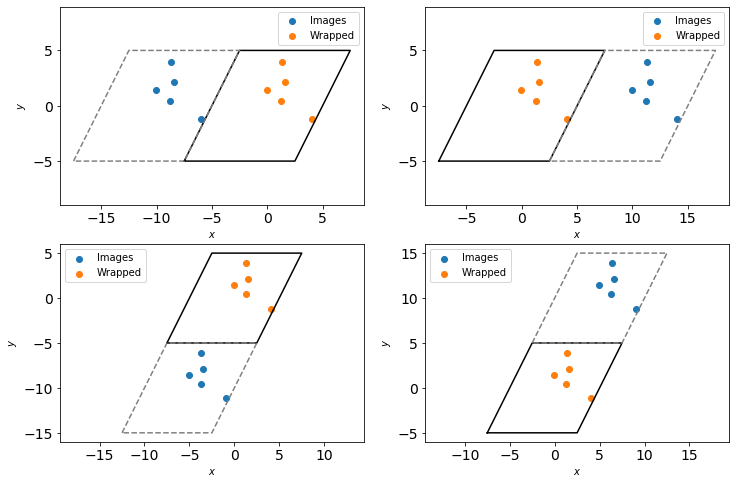

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
images = [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0]]

# Plot particles in each of the periodic boxes.
for ax, image in zip(axes.flatten(), images):
    box.plot(ax=ax)
    box.plot(ax=ax, image=image, linestyle="dashed", color="gray")
    particle_images = box.unwrap(particles, image)
    ax.scatter(particle_images[:, 0], particle_images[:, 1], label="Images")

    wrapped_particle_images = box.wrap(particle_images)
    ax.scatter(
        wrapped_particle_images[:, 0], wrapped_particle_images[:, 1], label="Wrapped"
    )

    ax.tick_params(axis="both", which="both", labelsize=14)
    ax.legend()

plt.show()